## **Analysis Of Breast Cancer in Patients Using Ensemble Techniques**




In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#reading the dataset
df=pd.read_csv("cancer.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### **LABEL ENCODING USING MAP FUNCTION**

In [2]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### **Drop Not Required Columns**

In [5]:
df.drop(["Unnamed: 32"],axis=1,inplace=True)

In [6]:
df.drop(["id"],axis=1,inplace=True)

## **If Any Missing Values**

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **EDA**

<Axes: xlabel='diagnosis', ylabel='count'>

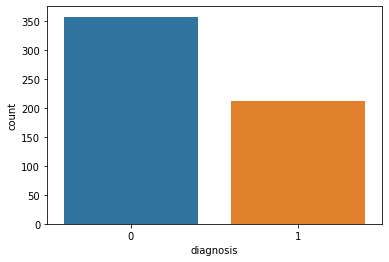

In [11]:
df['diagnosis']=pd.Categorical(df['diagnosis'])
sns.countplot(x = 'diagnosis', data =df)

In [12]:
df2 = df.drop(['diagnosis'],axis=1)

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


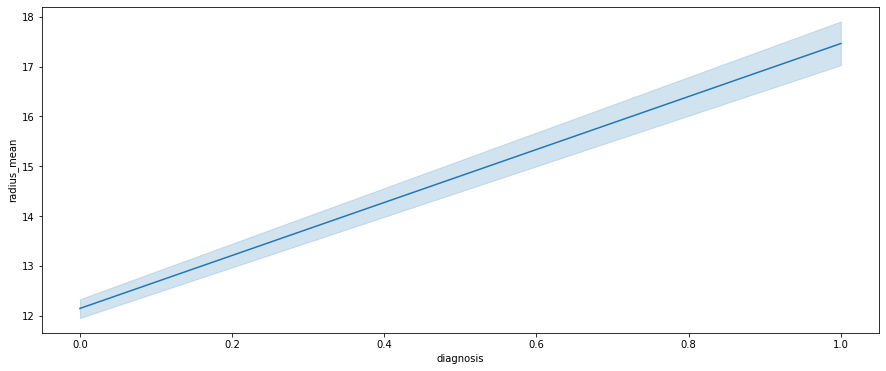

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


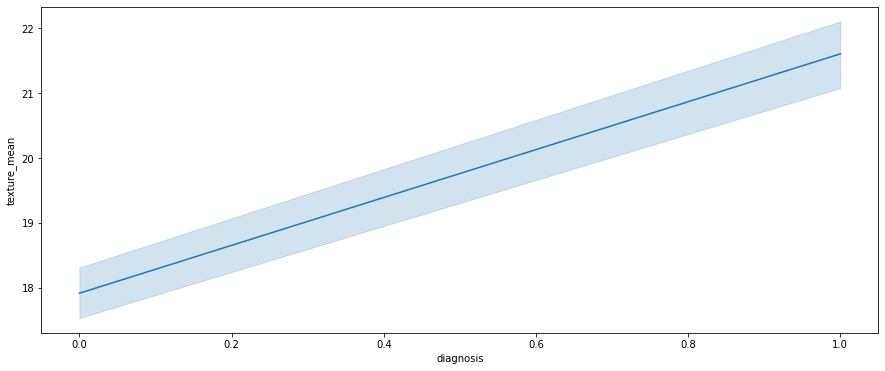

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


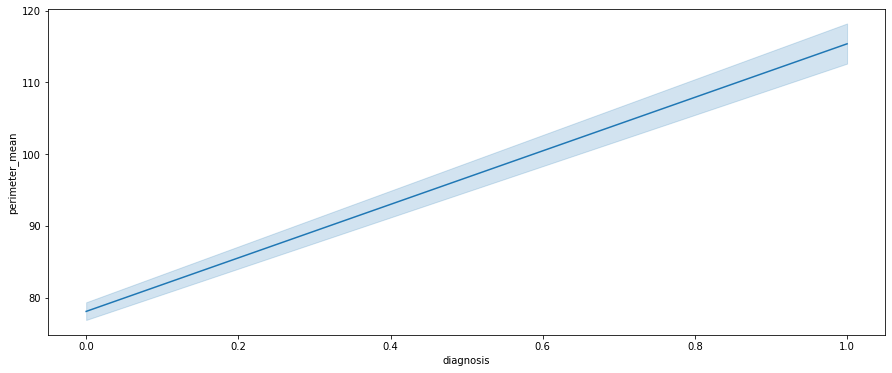

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


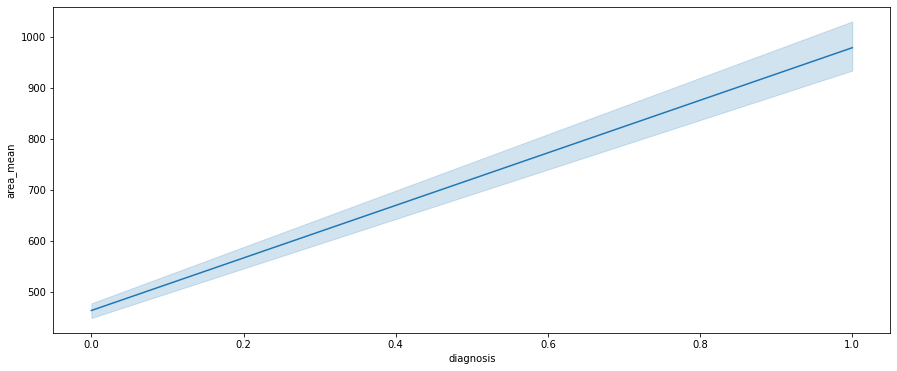

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


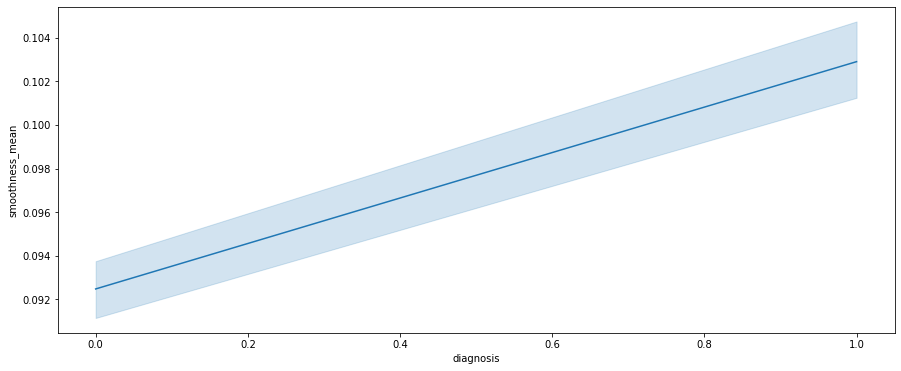

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


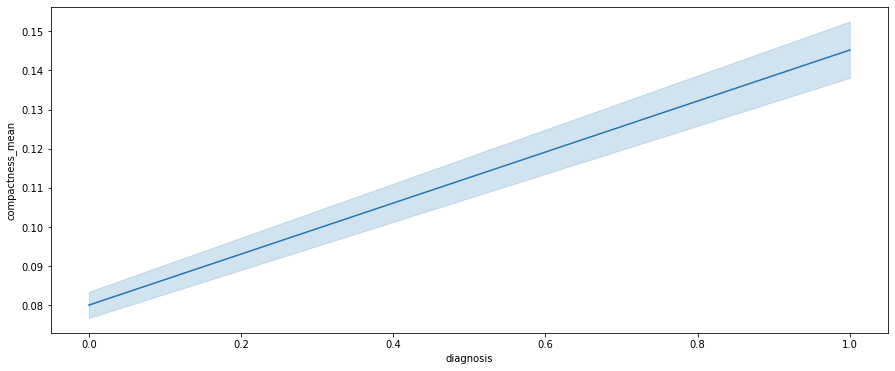

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


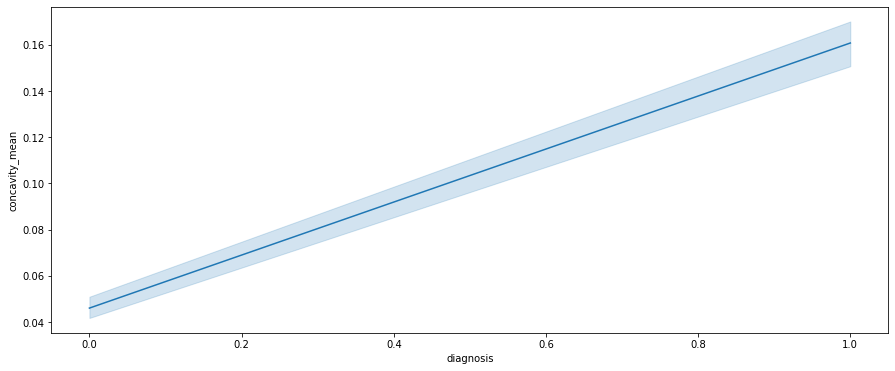

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


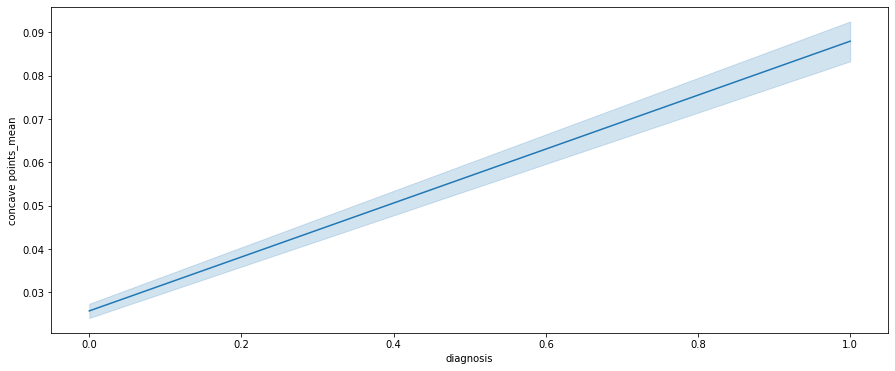

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


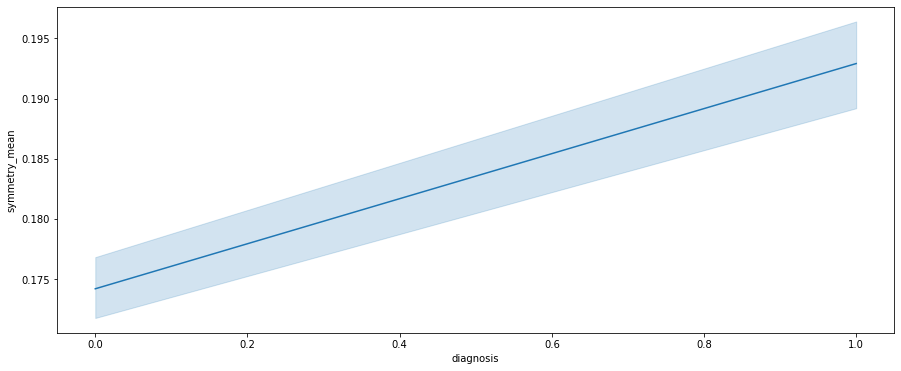

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


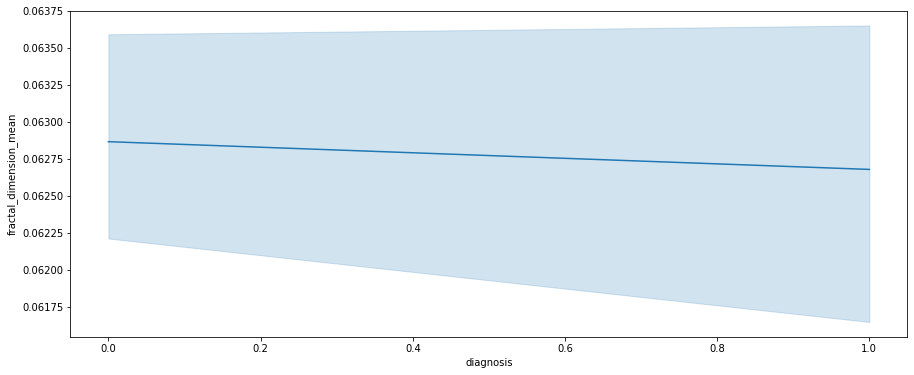

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


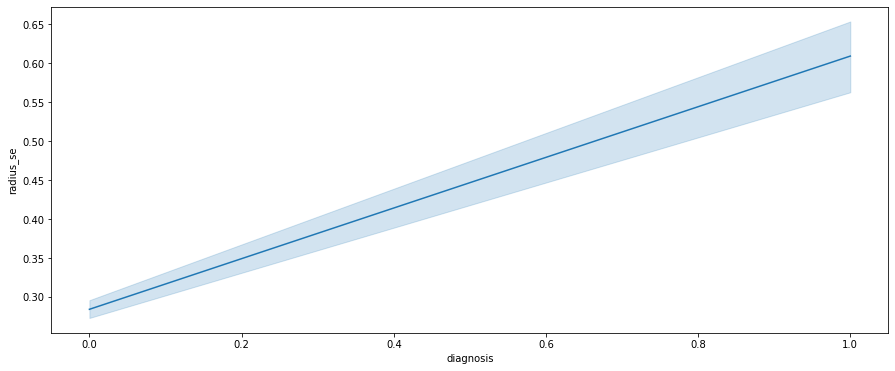

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


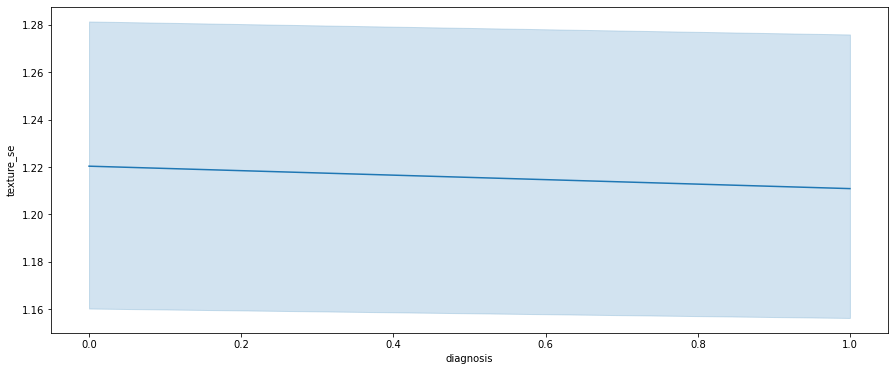

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


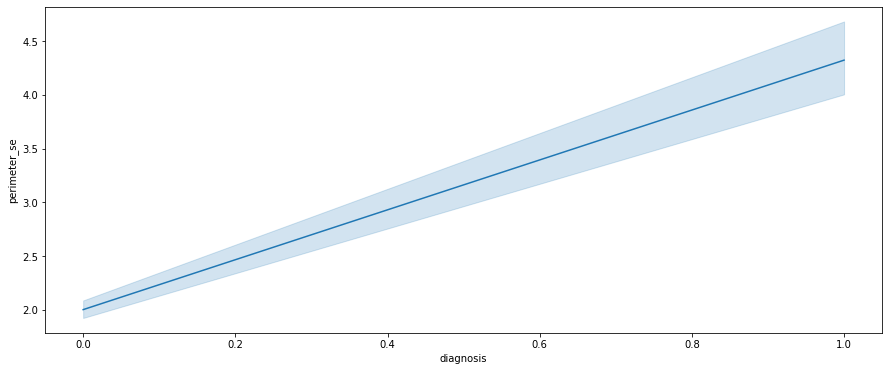

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


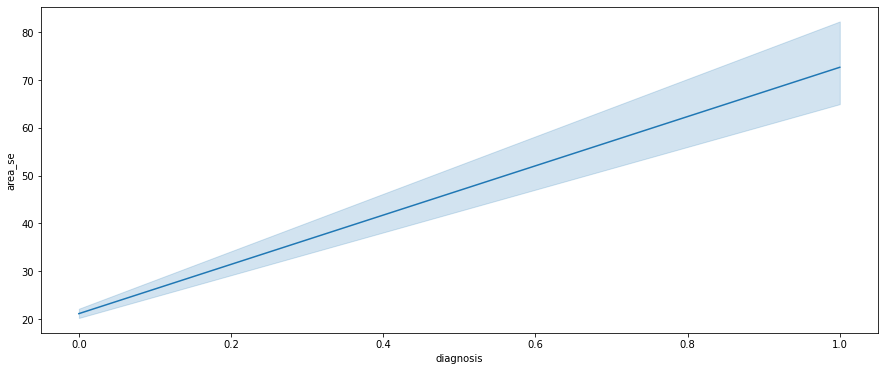

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


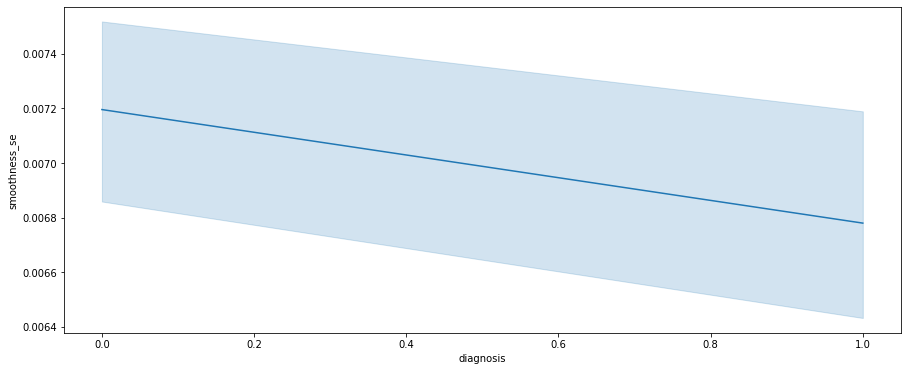

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


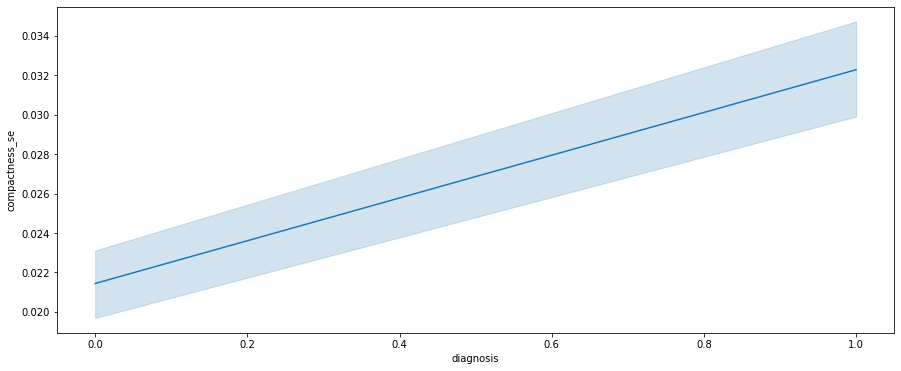

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


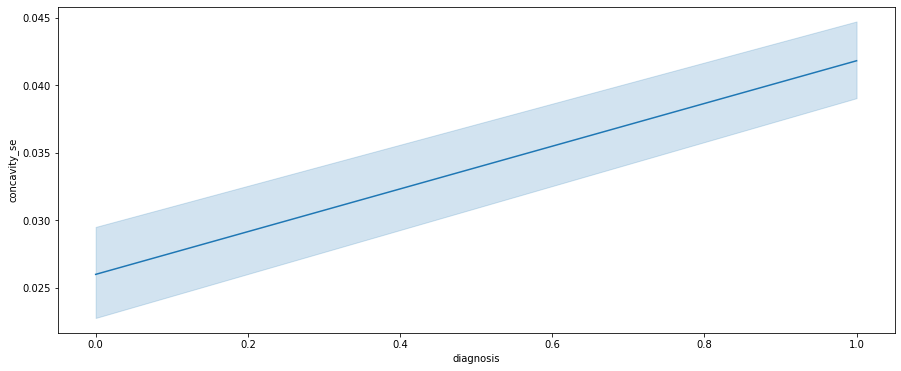

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


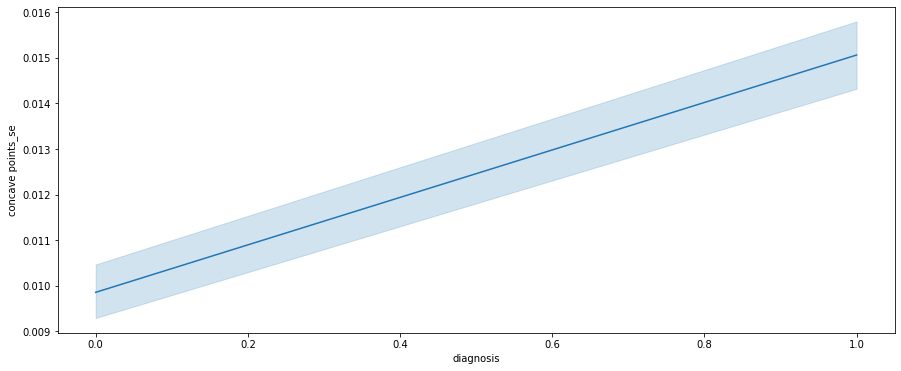

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


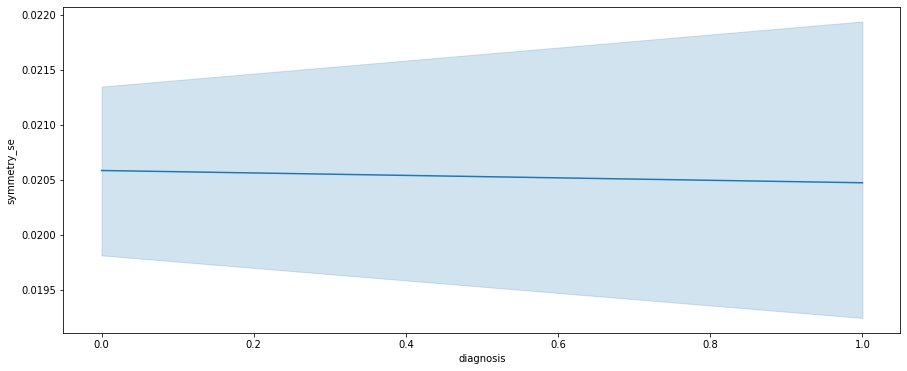

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


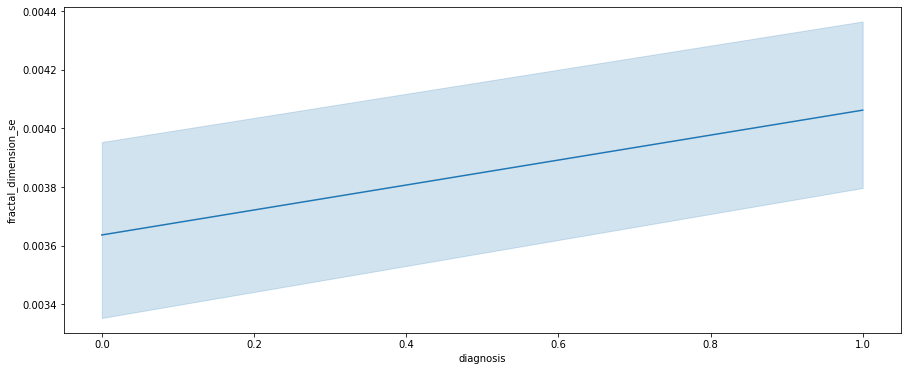

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


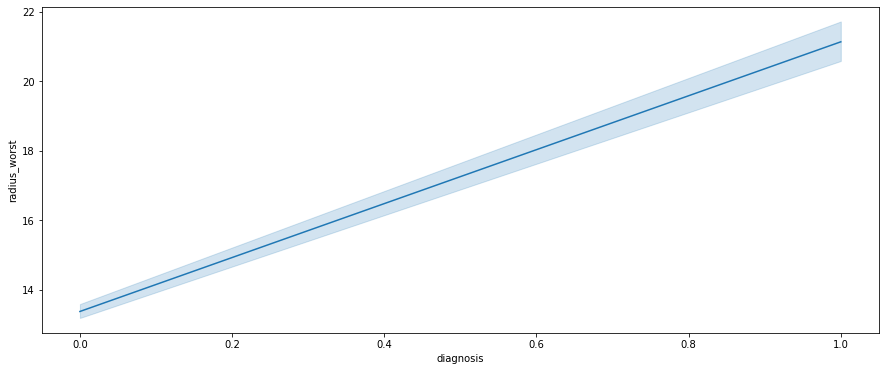

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


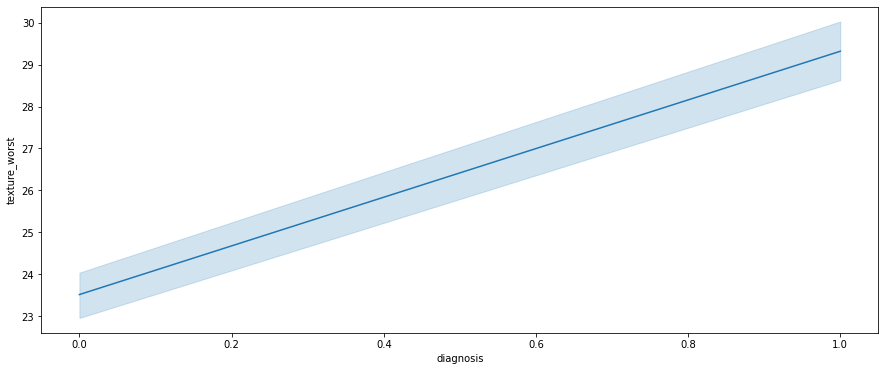

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


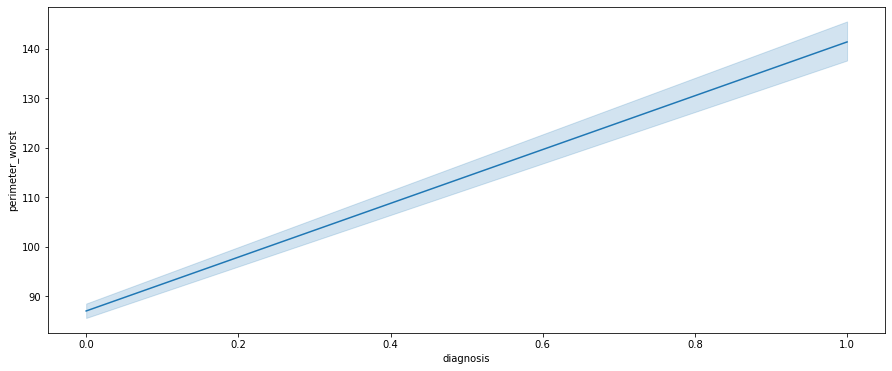

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


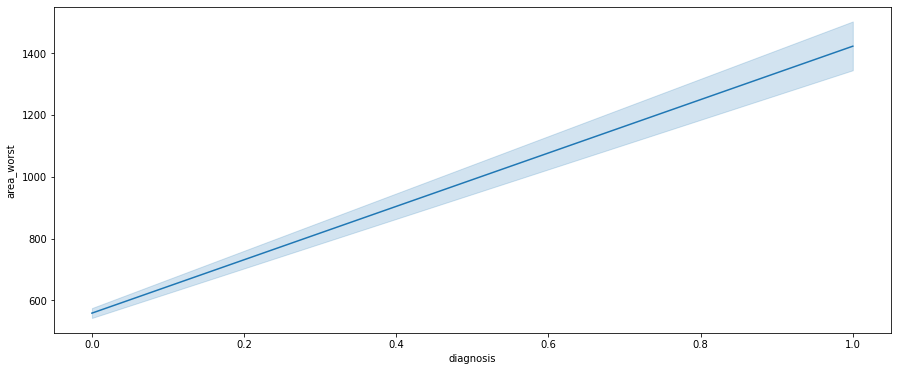

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


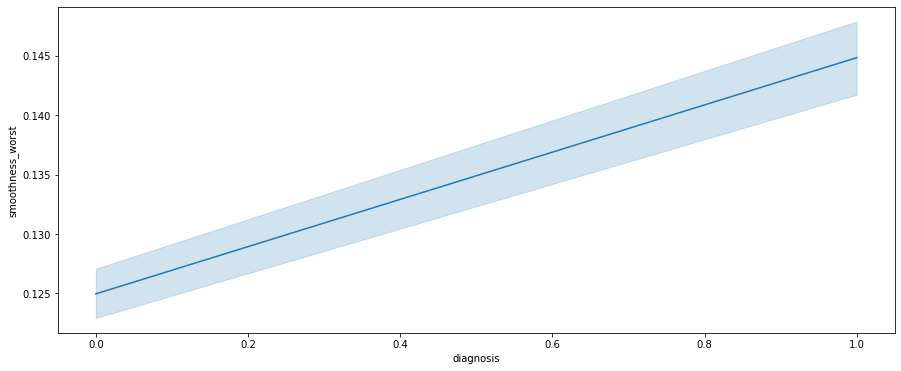

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


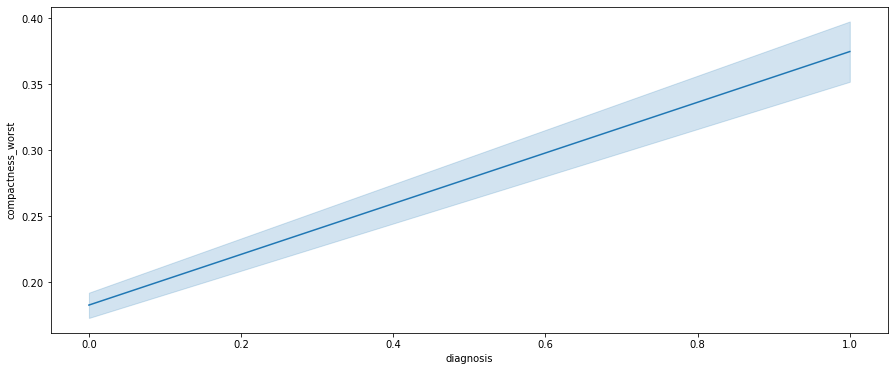

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


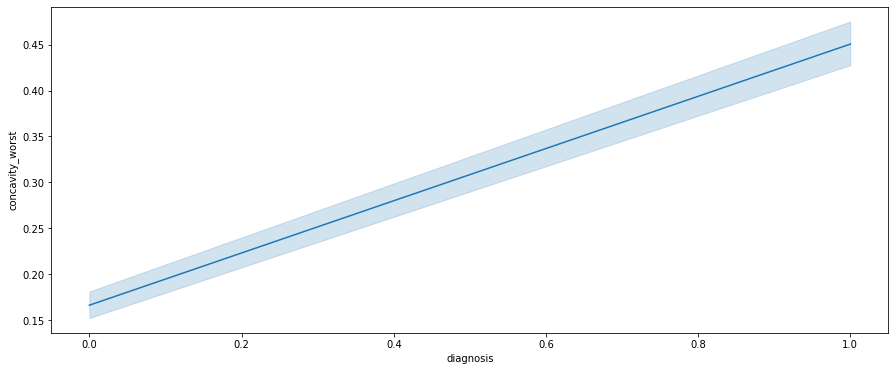

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


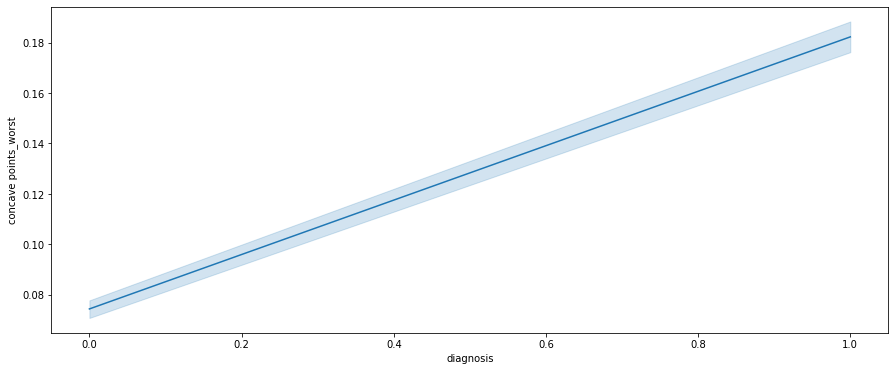

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


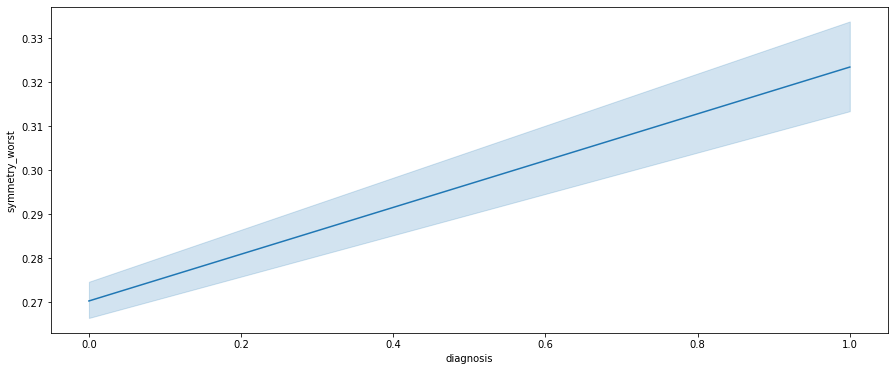

<ipython-input-13-4ad60da55a22>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')


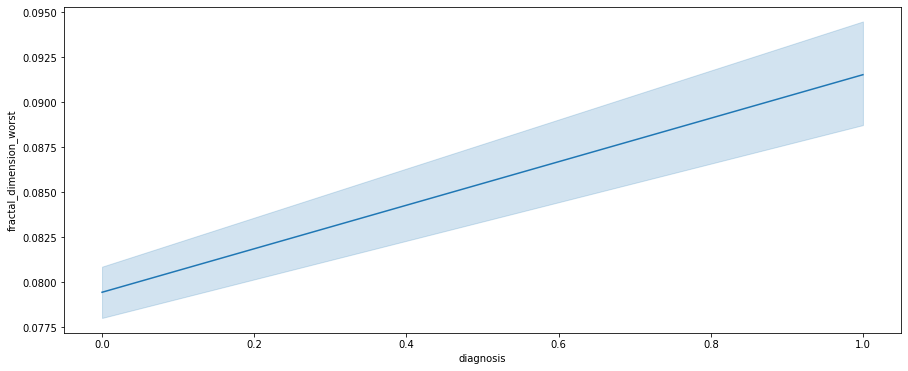

In [13]:
for i in df2.columns:
 plt.figure(figsize=(15,6))
 sns.lineplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')
 plt.show()

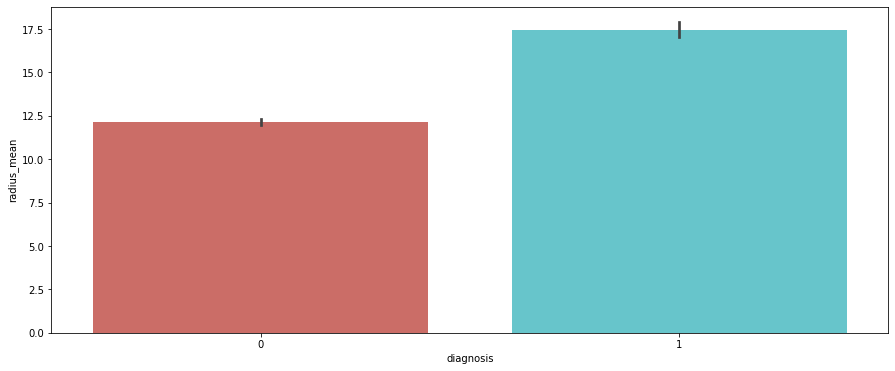

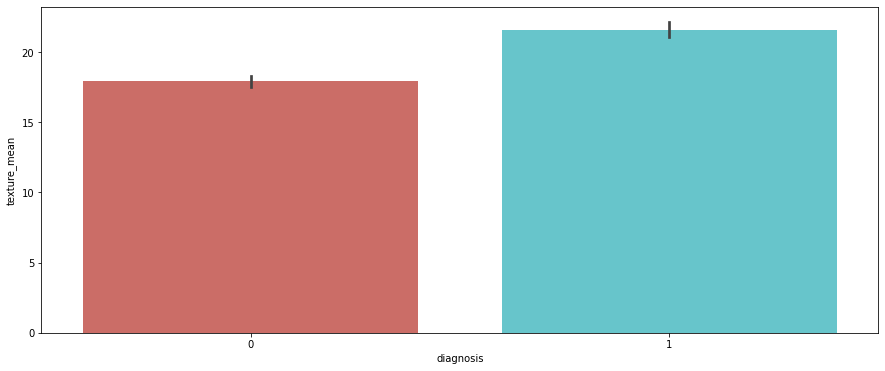

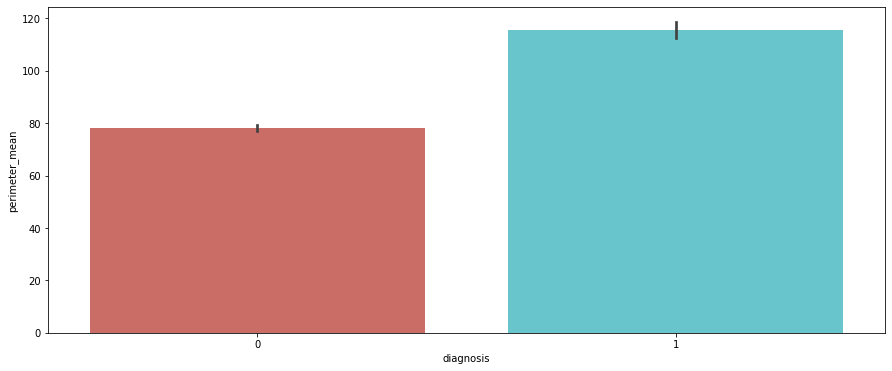

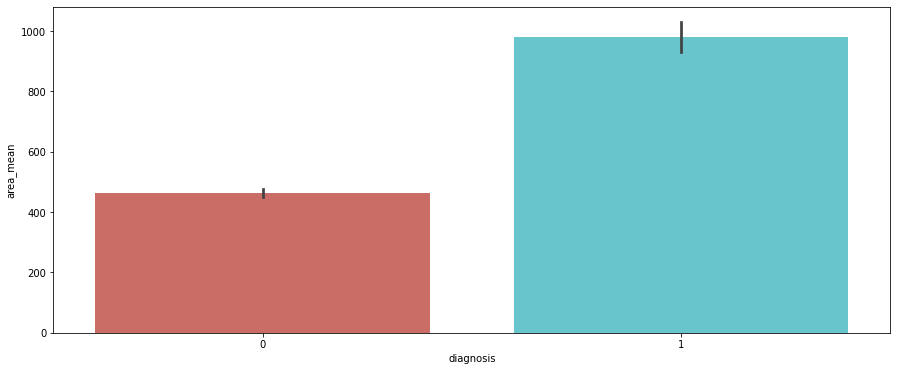

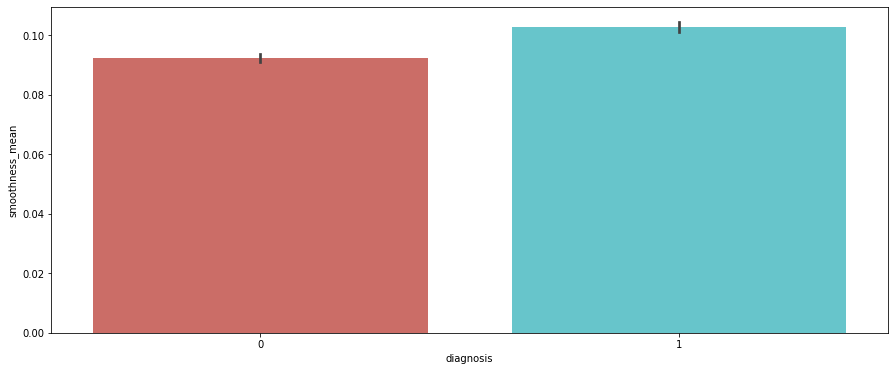

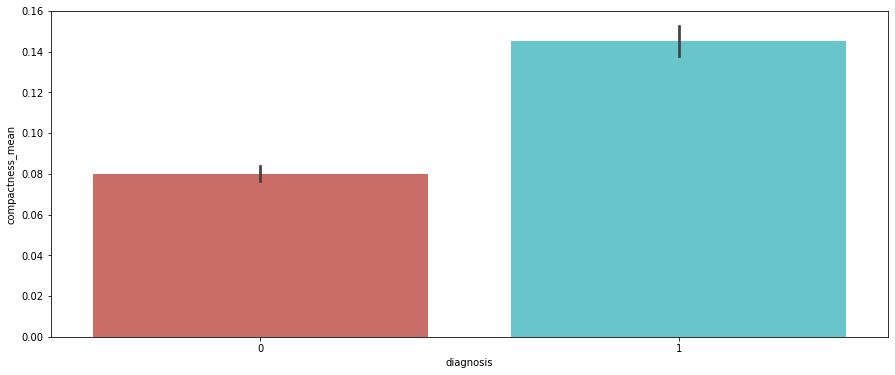

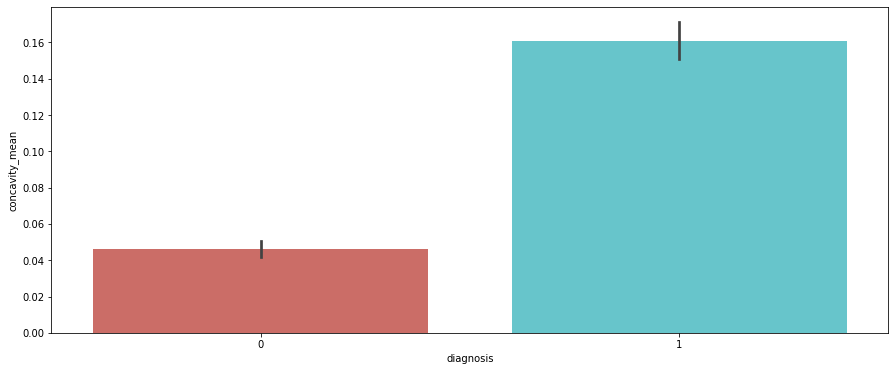

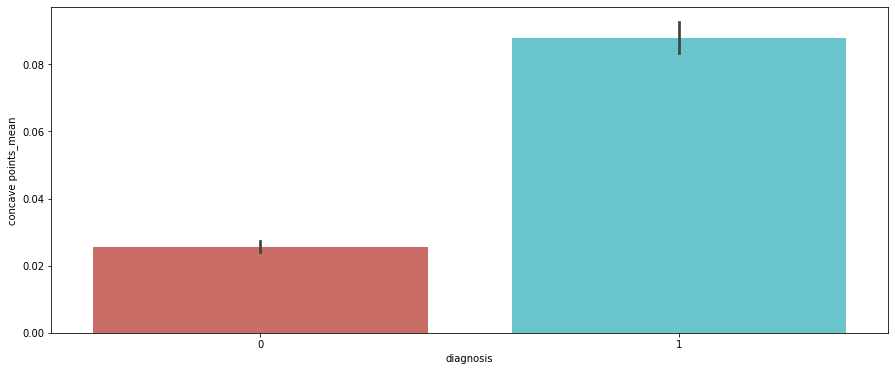

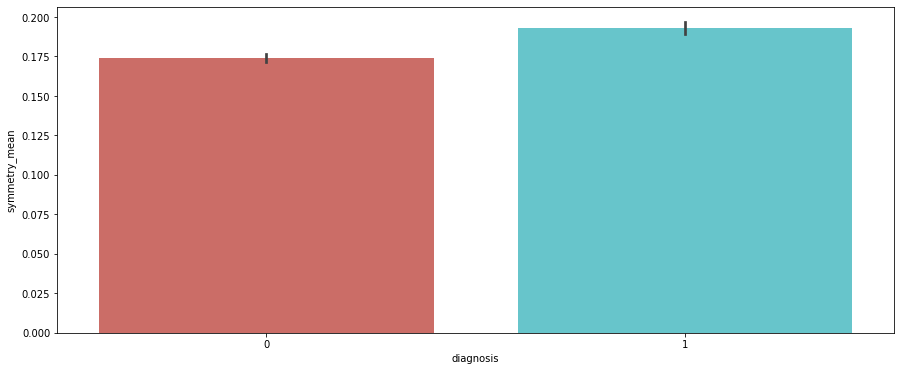

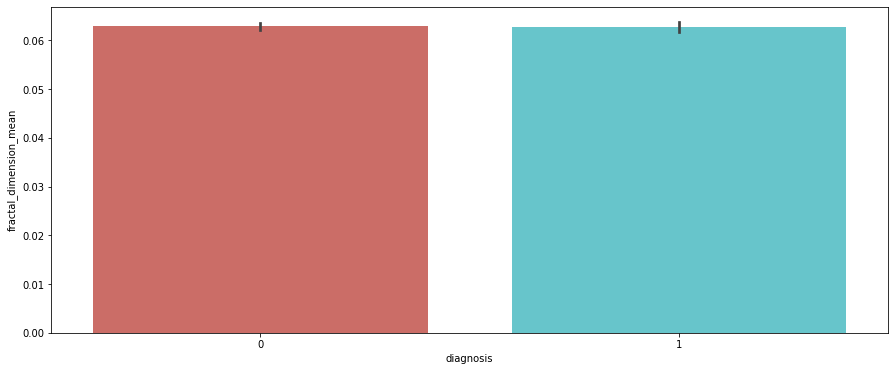

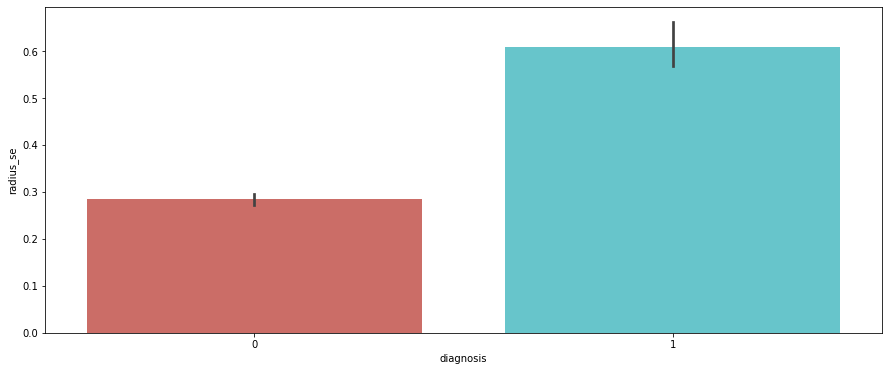

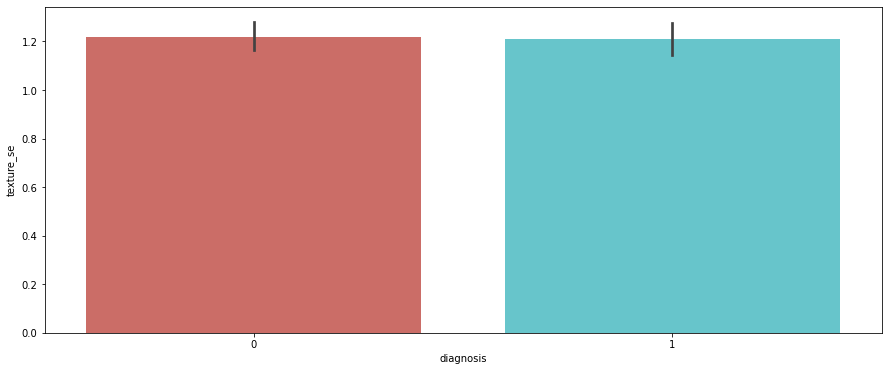

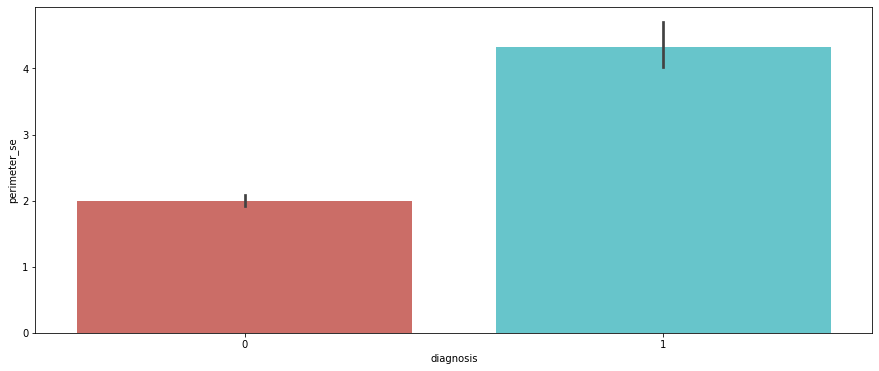

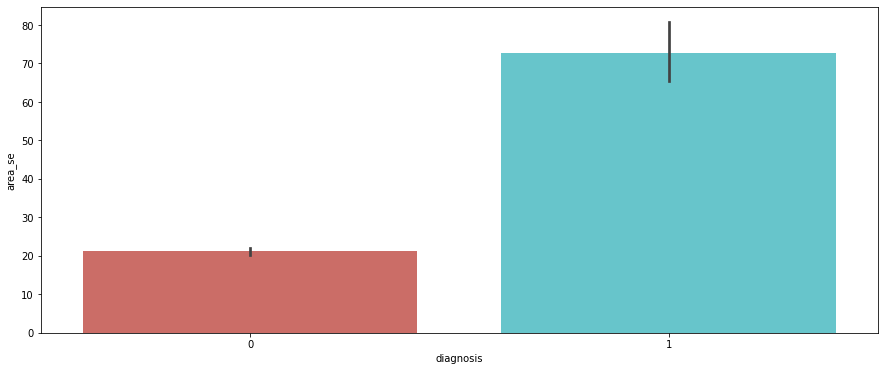

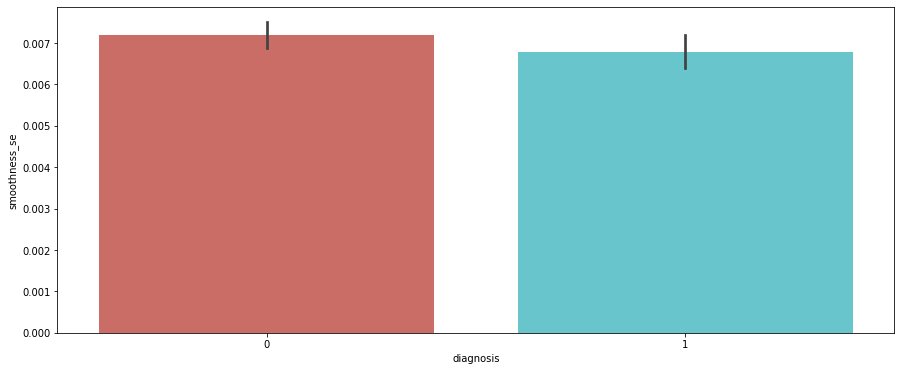

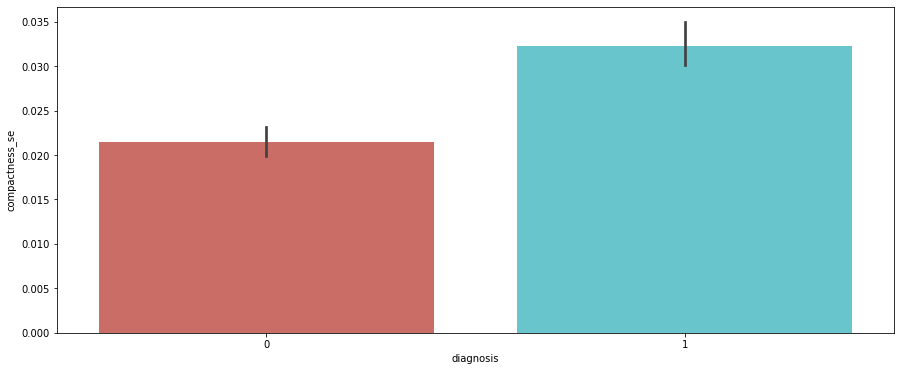

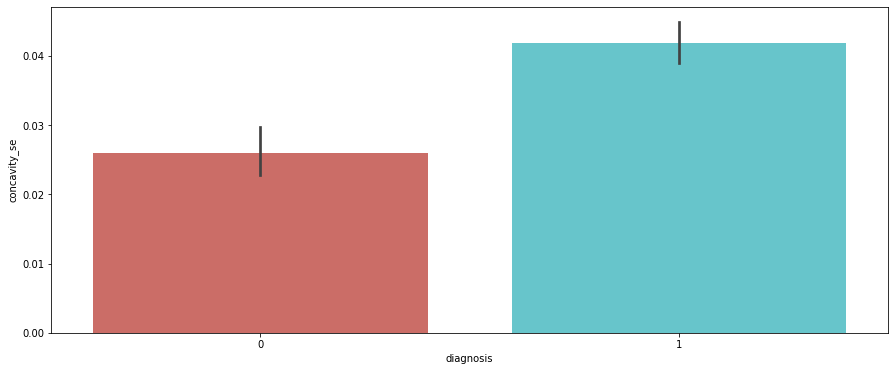

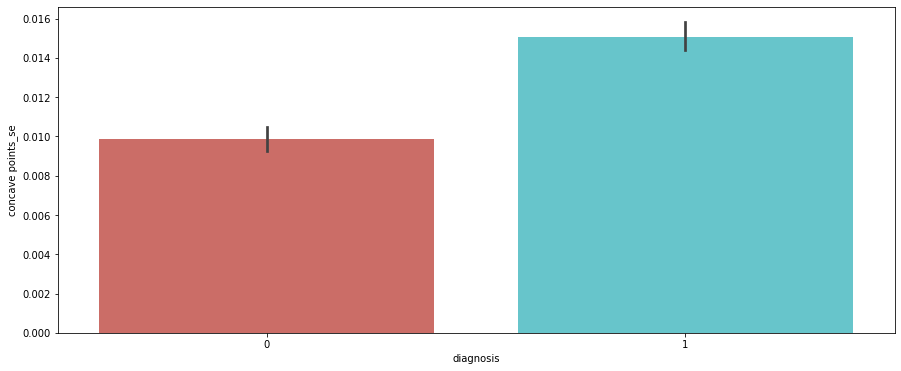

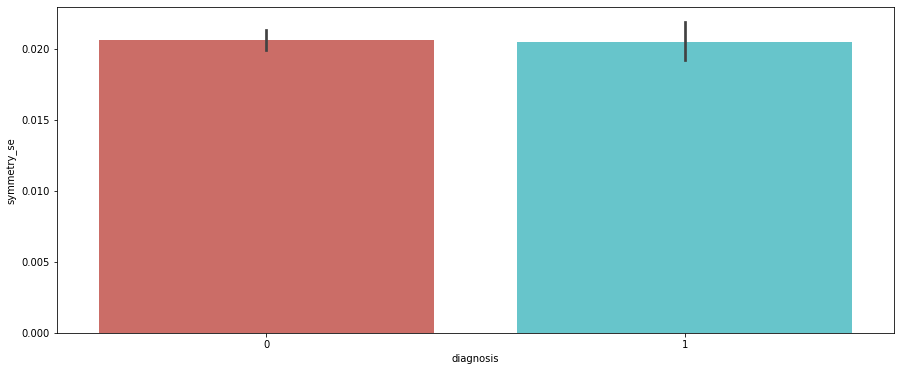

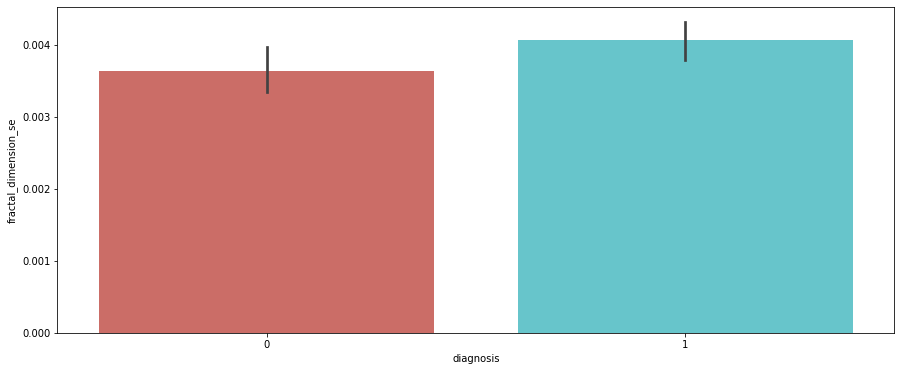

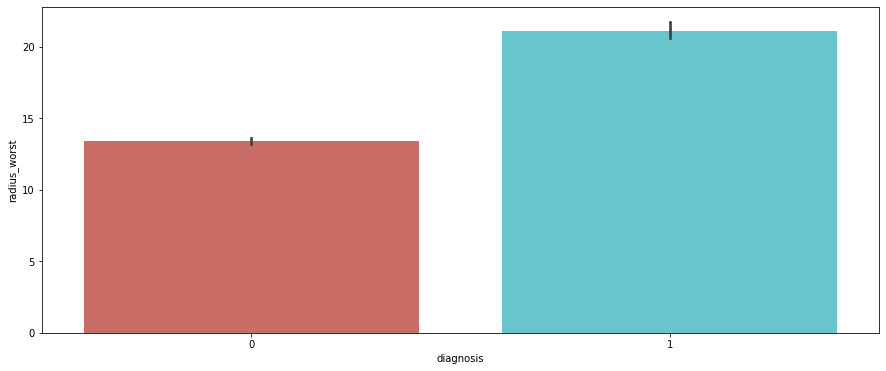

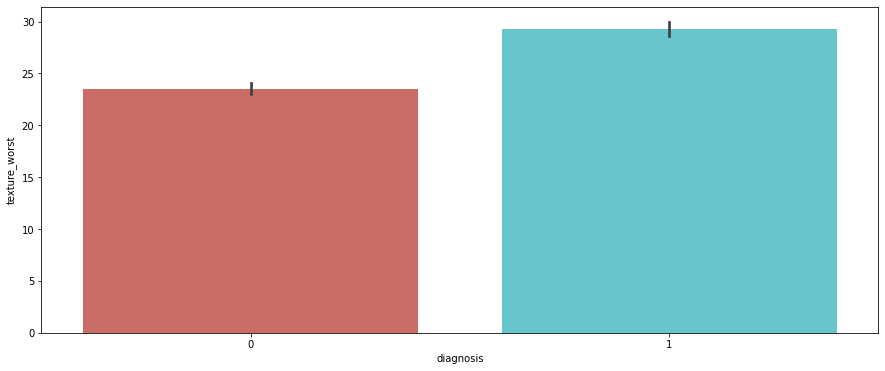

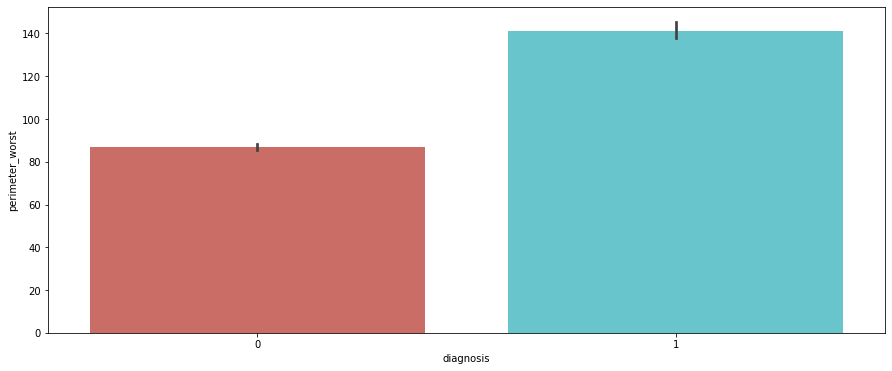

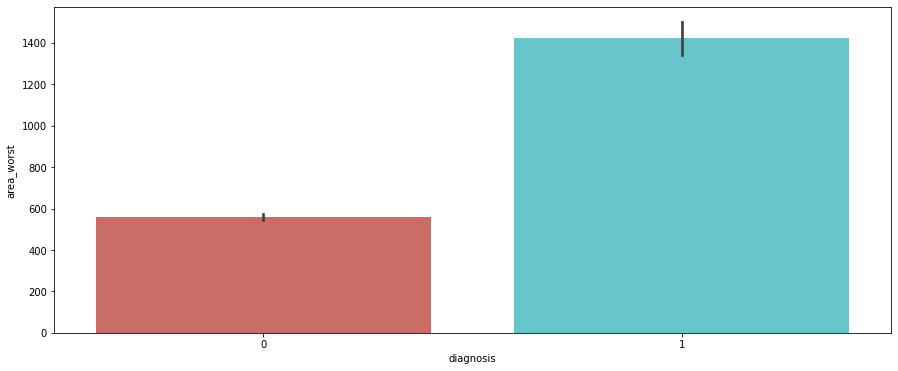

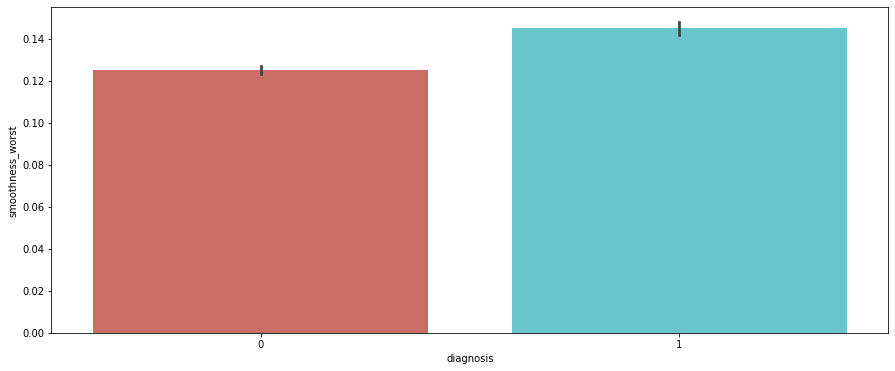

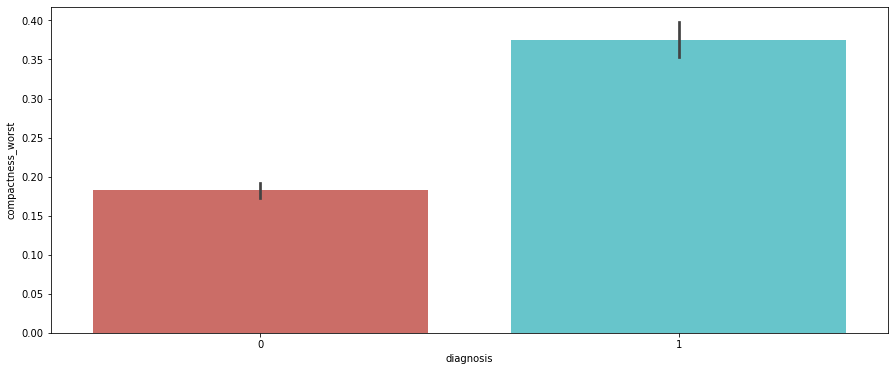

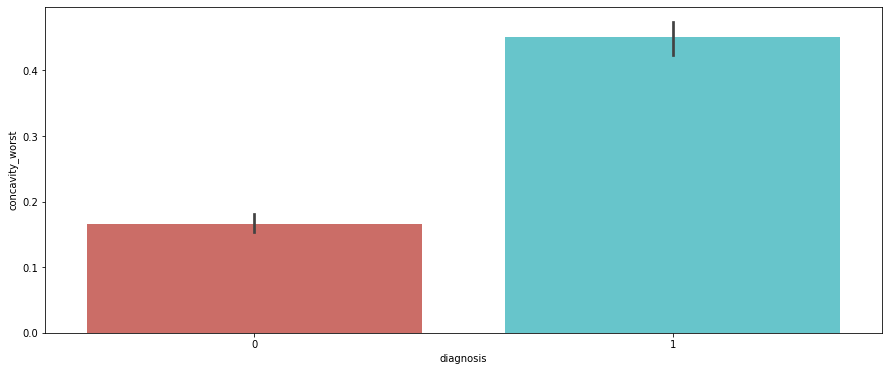

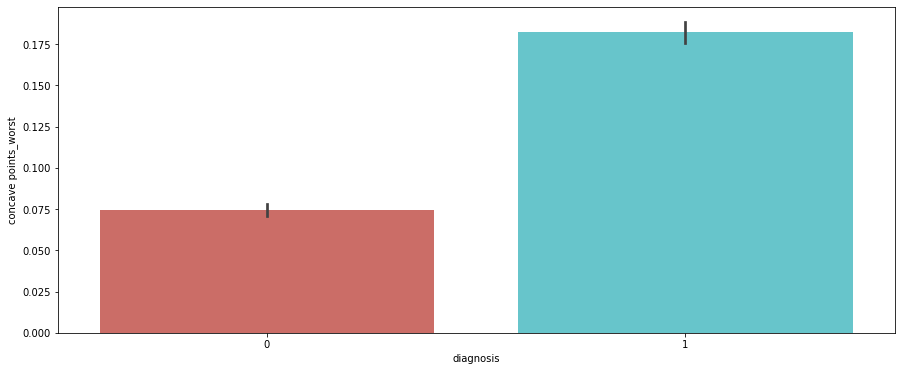

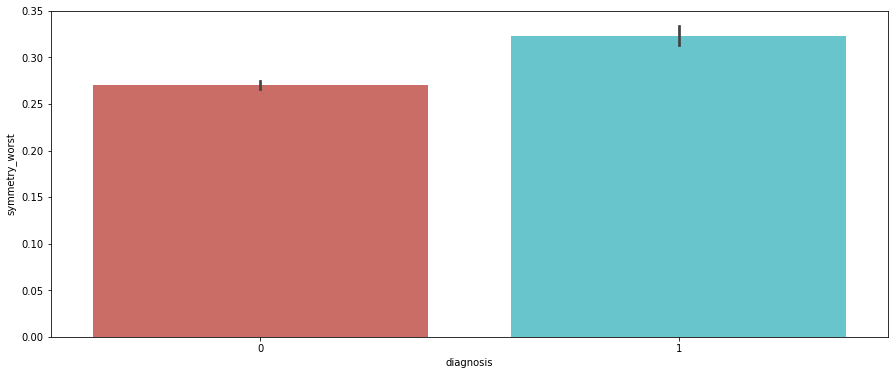

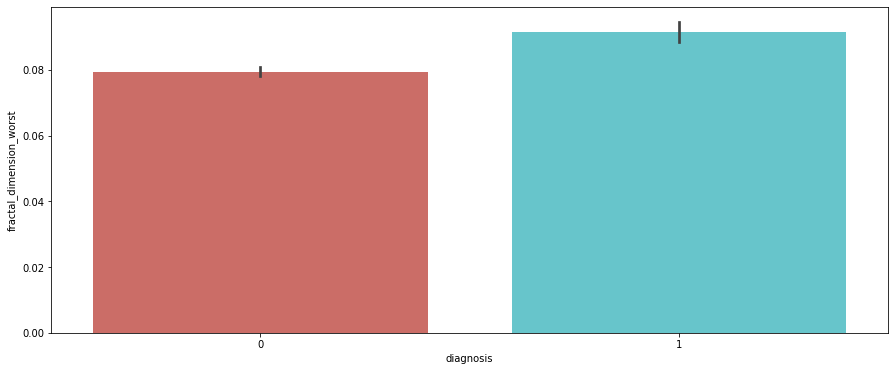

In [14]:
for i in df2.columns:
 plt.figure(figsize=(15,6))
 sns.barplot(x = df['diagnosis'], y = df2[i], data = df, palette = 'hls')
 plt.show()
 

## **CORRELATION**

In [15]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [16]:
list(df.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [17]:
import plotly.graph_objs as go
from plotly.graph_objs import *
cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
trace1 = go.Heatmap( 
  x= df[cols].corr().columns.tolist(), 
  y= df[cols].corr().columns.tolist(), 
  z= df[cols].corr().values.tolist(),
)
fig = go.Figure(data=[trace1])
fig.update_layout(height=800,
    width=900,template='plotly_dark',
                  title={'text':"Features Correlation HeatMap",
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'x':0.5,'y':0.9})
fig.show()

### **SPLITTING AND SCALING DATA**

In [18]:
#Split_the_data
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV


X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [19]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### **FURTHER USING OF ENSEMBLE TECHNIQUES FOR PREDICTION AND EVALUATION METRICS**

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay


0.8908342854463545
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4, random_state=5)


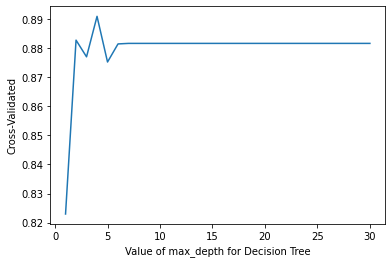

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
max_depth_range = list(range(1, 31))
param_grid = dict(max_depth=max_depth_range)
grid = GridSearchCV(dt, param_grid, cv=10, scoring='f1', return_train_score=False)
grid.fit(X_train_std, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(max_depth_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Accuracy of Bagging model is:  0.9790209790209791
Confusion matrix of Bagging model is: 
 [[88  0]
 [ 3 52]]
F1 score of Bagging model is:  0.9719626168224299


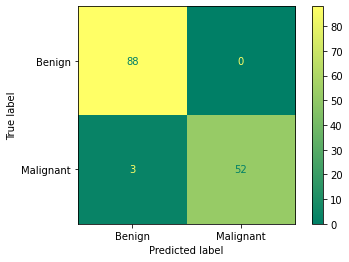

In [30]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

base_model = tree.DecisionTreeClassifier(max_depth = 4)
modelb = BaggingClassifier(estimator=base_model)
modelb.fit(X_train_std, y_train)
y_pred = modelb.predict(X_test_std)

bagging_acc = accuracy_score(y_test, y_pred)

print("Accuracy of Bagging model is: ", bagging_acc)
modelb.score(X_test,y_test)

bagging_f1 = f1_score(y_test, y_pred)
bagging_cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix of Bagging model is: \n", bagging_cm)
print("F1 score of Bagging model is: ", bagging_f1)

cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

*TP: 52 positive cases correctly predicted*

*TN: 88 negative cases correctly predicted*

*FP: 0 negative cases are misclassified (wrong positive predictions)*

*FN: 3 positive cases are misclassified (wrong negative predictions)*


Accuracy of AdaBoost model is:  0.9790209790209791
Confusion matrix of AdaBoost model is: 
 [[87  1]
 [ 2 53]]
F1 score of AdaBoost model is:  0.9724770642201834


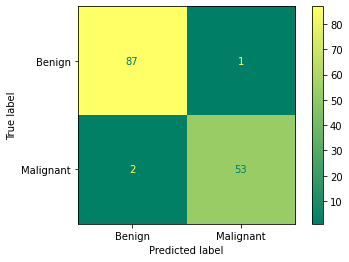

In [29]:
modela = AdaBoostClassifier()


modela.fit(X_train_std, y_train)
y_pred = modela.predict(X_test_std)
ada_acc = accuracy_score(y_test, y_pred)

print("Accuracy of AdaBoost model is: ", ada_acc)

ada_f1 = f1_score(y_test, y_pred)
ada_cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix of AdaBoost model is: \n", ada_cm)
print("F1 score of AdaBoost model is: ", ada_f1)

cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

*TP: 53 positive cases correctly predicted*

*TN: 87 negative cases correctly predicted*

*FP: 1 negative cases are misclassified (wrong positive predictions)*

*FN: 2 positive cases are misclassified (wrong negative predictions)*

Accuracy of XGBoost model is:  0.986013986013986
Confusion matrix of XGBoost model is: 
 [[88  0]
 [ 2 53]]
F1 score of XGBoost model is:  0.9814814814814815
[0.00058321 0.01330895 0.04218892 0.00695925 0.01474382 0.
 0.0061036  0.08052671 0.00066756 0.01504122 0.0110308  0.01861281
 0.07753899 0.00783494 0.         0.00283427 0.         0.02180274
 0.00553726 0.00861911 0.02344553 0.01774397 0.10458802 0.06024754
 0.00339734 0.00344388 0.0318049  0.41166803 0.00408697 0.00563963]


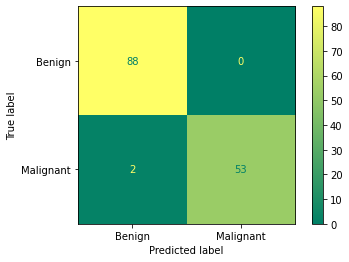

In [26]:
modelx = XGBClassifier()
modelx.fit(X_train_std, y_train)
y_pred = modelx.predict(X_test_std)
xgb_acc = accuracy_score(y_test, y_pred)
print("Accuracy of XGBoost model is: ", xgb_acc)

xgb_f1 = f1_score(y_test, y_pred)
xgb_cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix of XGBoost model is: \n", xgb_cm)
print("F1 score of XGBoost model is: ", xgb_f1)
print(modelx.feature_importances_)

cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

*TP: 53 positive cases correctly predicted*

*TN: 88 negative cases correctly predicted*

*FP: 0 negative cases are misclassified (wrong positive predictions)*

*FN: 2 positive cases are misclassified (wrong negative predictions)*

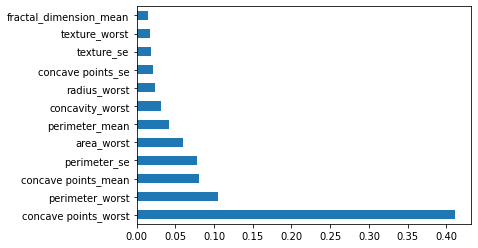

In [36]:
feat_importances = pd.Series(modelx.feature_importances_, index=df2.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### **MODEL PERFORMANCE COMPARISON USING BAR GRAPH**

In [37]:
import plotly.graph_objects as go

models = ['Bagging', 'AdaBoost', 'XGBoost']
accuracy_scores = [bagging_acc, ada_acc, xgb_acc]
f1_scores = [bagging_f1, ada_f1, xgb_f1]

fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=models, y=accuracy_scores),
    go.Bar(name='F1 Score', x=models, y=f1_scores)
])

fig.update_layout(barmode='group', title_text='Comparison of Model Performance', xaxis_title='Models', yaxis_title='Score')
fig.show()


### **SUMMARY**

***Since our project is medical diagnosis we need to give maximum importance to Type II error in statistics(False Negative).False Negative is that the truth is positive, but the test predicts a negative. The person is sick, but the test inaccurately reports that they are not.Results show that XGBM was the most powerful prediction model than other ensemble machine learning techniques for Breast Cancer dataset.***


